In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime

### Goal questions

I don't have much experience with biodiversity data at all tbh. This all kind of new to me. However, new is exciting and exciting is challenging so I'll come at this with a naive positivity point of view.

There are guide questions that needs to be answered. I do feel that these are still big questions and I plan to divide it into <i>smaller questions that are easier to answer.</i>


#### Is the biodiversity in this area endangered? To what degree?**
- How do we define biodiversity?
- Is there a metric/index that is readily available to do this?
- What kind of dataset do we need in order to get a good read on the state of biodiversity?
- Maybe find similar cases where biodiversity was preserved/destroyed?

#### What are the biggest risks to biodiversity in the area?
- What are the different risk factors to biodiversity?
- How can we classify if a certain factor is categorized as risk

#### Which biodiversity class is the most endangered?
- How do we define "endangered"?
- What are the different classes/categories in which we can classify biodiversity?

#### How might habitat loss change the biodiversity in this area?
- Can we find similar cases that can support the effect of habitat loss?
- How can we mitigate habitat loss in the first place? 
- Is there a certain threshold that defines an irreversible habitat loss effect?

#### Calculate a biodiversity index/metric that communicates the state of biodiversity in a single number (explain your working and any sources you may have used to build this)
- I think this is the most technically challenging part
- Can we define a single number for this? This is a multiclass/multivariable type of problem, maybe we can assign different weights to those important variables to be able to create a single value? Might be difficult to represent outliers though :(

---------------------------

Some stuff to check, ideas at the top of my head

- Simpson's Diversity 
- Diversity index over time (?)
- Show a mapping of the diversity data

In [3]:
heading = pd.read_csv("data/headings.csv")
heading.head(len(heading))

,Column name,Requested field,DwC Name,Field name,Field description,Download field name,Download field description,More information
0,images,imageIDs,images,imageIDs,images,imageIDs,images,Image URLs for this record http://rs.tdwg.org/...
1,raw_recordedBy,raw_recordedBy,NaN,raw_recordedBy,recordedBy (unprocessed),raw_recordedBy,Collector - original,NaN
2,dcterms:modified,modified,dcterms:modified,modified,NaN,modified,NaN,NaN
3,dcterms:language,language,dcterms:language,language,NaN,language,NaN,Language of the record
4,dcterms:license,license,dcterms:license,license,License,license,Licence,The license applying to a record.
...,...,...,...,...,...,...,...,...
198,measurementDeterminedBy,measurementDeterminedBy,measurementDeterminedBy,measurementDeterminedBy,Measurement Determined By,measurementDeterminedBy,NaN,http://rs.tdwg.org/dwc/terms/measurementDeterm...
199,measurementAccuracy,measurementAccuracy,measurementAccuracy,measurementAccuracy,Measurement Accuracy,measurementAccuracy,NaN,http://rs.tdwg.org/dwc/terms/measurementAccuracy
200,relatedResourceID,relatedResourceID,relatedResourceID,relatedResourceID,Related Resource ID,relatedResourceID,NaN,http://rs.tdwg.org/dwc/terms/relatedResourceID
201,images,imageIDs,images,imageIDs,images,imageIDs,images,Image URLs for this record http://rs.tdwg.org/...


In [4]:
data = pd.read_csv("data/schofield_radius_5_.csv", low_memory=False)
data.head(5)

,dataResourceUid,images,raw_recordedBy,dcterms:modified,dcterms:language,dcterms:license,rightsHolder,dcterms:accessRights,dcterms:bibliographicCitation,references,...,verbatimScientificName,verbatimContinent,measurementID,measurementType,measurementUnit,measurementDeterminedBy,measurementAccuracy,relatedResourceID,images.1,dcterms:type
0,dr1010,NaN,NaN,NaN,NaN,CC-BY 3.0 (Int),NaN,NaN,NaN,NaN,...,Ocyphaps lophotes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,dr1010,NaN,observation,NaN,NaN,CC-BY 3.0 (Int),NaN,NaN,NaN,NaN,...,Rwaida Maragan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,dr1010,NaN,NaN,NaN,NaN,CC-BY 3.0 (Int),NaN,NaN,NaN,NaN,...,Ocyphaps lophotes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,dr1010,NaN,NaN,NaN,NaN,CC-BY 3.0 (Int),NaN,NaN,NaN,NaN,...,Pteropus poliocephalus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,dr1010,NaN,97cfbd084e3a198764e9630f6ea694eccdb32c55,NaN,NaN,CC-BY 3.0 (Int),NaN,NaN,NaN,NaN,...,Doryanthes excelsa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Quick cleanup

- Just remove columns that contains `null` values for all data points
- Check columns that contain only one unique value, see if they can be removed
- Add a proper datetime column for easier filters
- **ASSUMPTION**: The `individualCount` column seems to represent only visual events. There are other columns that has `NaN` values but contain other type of events, e.g. sound, etc. Just assign `1` for these events. Create a `final_count` col just to be sure.

In [5]:
# basisOfRecord - what kind of observation is done
# individualCount - number of counted organism?
empty_cols = []
for c in data.columns:
    if data[c].isnull().values.all():
        empty_cols.append(c)
        
# Drop columns with all empty values
pd.set_option("display.max_columns", None)
data_without_empty = data.drop(empty_cols, axis=1)

# Check columns with only one value, see if they can all be removed
cols_with_one_value = []
for c in data_without_empty.columns:
    if data_without_empty[c].nunique() == 1:
        print(data_without_empty[c].value_counts())
        cols_with_one_value.append(c)

cleaned_data = data_without_empty.drop(cols_with_one_value, axis=1)        
cleaned_data["date_clean"] = pd.to_datetime(cleaned_data.eventDate)
cleaned_data["final_count"] = cleaned_data.individualCount.fillna(1)

cleaned_data.head(3)

dcterms:language
en    23088
Name: count, dtype: int64
dcterms:accessRights
https://florabase.dpaw.wa.gov.au/help/copyright    5
Name: count, dtype: int64
occurrenceStatus
PRESENT    32688
Name: count, dtype: int64
organismID
white patch around genitals    1
Name: count, dtype: int64
organismRemarks
A stringybark.    2
Name: count, dtype: int64
waterBody
not applicable    17
Name: count, dtype: int64
islandGroup
not applicable    17
Name: count, dtype: int64
island
not applicable    17
Name: count, dtype: int64
country
Australia    32688
Name: count, dtype: int64
countryCode
AU    32688
Name: count, dtype: int64
stateProvince
New South Wales    32688
Name: count, dtype: int64
geodeticDatum
EPSG:4326    32688
Name: count, dtype: int64
georeferenceVerificationStatus
verified    571
Name: count, dtype: int64
georeferenceRemarks
Grid not provided, assumed MGA.    83
Name: count, dtype: int64
typeStatus
SYNTYPE    1
Name: count, dtype: int64


,dataResourceUid,images,raw_recordedBy,dcterms:modified,dcterms:license,rightsHolder,dcterms:bibliographicCitation,references,institutionID,collectionID,datasetID,institutionCode,collectionCode,datasetName,ownerInstitutionCode,basisOfRecord,dataGeneralizations,dynamicProperties,occurrenceID,catalogNumber,recordNumber,recordedBy,individualCount,sex,lifeStage,reproductiveCondition,behavior,establishmentMeans,preparations,disposition,associatedMedia,associatedReferences,associatedTaxa,otherCatalogNumbers,occurrenceRemarks,associatedOccurrences,previousIdentifications,eventID,fieldNumber,eventDate,eventTime,year,month,day,verbatimEventDate,habitat,samplingProtocol,samplingEffort,fieldNotes,eventRemarks,locationID,higherGeography,county,municipality,locality,locality.1,verbatimLocality,minimumElevationInMeters,maximumElevationInMeters,verbatimElevation,locationAccordingTo,locationRemarks,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,coordinatePrecision,verbatimCoordinates,verbatimLatitude,verbatimLatitude.1,verbatimLongitude,verbatimLongitude.1,verbatimCoordinateSystem,verbatimCoordinateSystem.1,verbatimSRS,georeferencedBy,georeferencedDate,georeferenceProtocol,georeferenceSources,identificationID,identificationQualifier,identifiedBy,dateIdentified,identificationVerificationStatus,identificationRemarks,taxonID,scientificNameID,acceptedNameUsageID,taxonConceptID,scientificName,acceptedNameUsage,parentNameUsage,nameAccordingTo,higherClassification,kingdom,phylum,class,order,family,genus,subgenus,specificEpithet,infraspecificEpithet,taxonRank,verbatimTaxonRank,scientificNameAuthorship,vernacularName,nomenclaturalCode,taxonomicStatus,taxonRemarks,verbatimBasisOfRecord,species,provenance,sounds,recordID,rights,verbatimScientificName,verbatimContinent,images.1,dcterms:type,date_clean,final_count
0,dr1010,NaN,NaN,NaN,CC-BY 3.0 (Int),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OBSERVATION,NaN,"{""nestPresent"":""No"",""recorderID"":""1188""}",NaN,534167b03f905e2143000011,NaN,NaN,3.0,NaN,NaN,NaN,Feeding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-03-27T03:40:00Z,NaN,2014.0,3.0,27.0,NaN,Nature reserve,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-33.750613,150.862390,1000.0,NaN,NaN,150.862390,NaN,-33.750613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://biodiversity.org.au/afd/taxa/a7b00ef0-...,Ocyphaps lophotes,NaN,NaN,NaN,NaN,Animalia,Chordata,Aves,Columbiformes,Columbidae,Ocyphaps,NaN,NaN,NaN,species,NaN,"(Temminck, 1822)",Crested Pigeon,NaN,NaN,NaN,observation,Ocyphaps lophotes,Published dataset,NaN,9fe3ad43-b9b9-4a7d-8502-5a0ad252ad0f,NaN,Ocyphaps lophotes,NaN,NaN,NaN,2014-03-27 03:40:00+00:00,3.0
1,dr1010,NaN,observation,NaN,CC-BY 3.0 (Int),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OCCURRENCE,NaN,"{""Treehealth"":""Healthy"",""Phenophase/Behaviour""...",NaN,58d7711a94cf704301000077,NaN,Observation,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-26T18:43:25Z,NaN,2017.0,3.0,26.0,NaN,Urban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-33.737027,150.860172,1000.0,NaN,NaN,-33.737027,NaN,150.860172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pencil Pine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pending,NaN,Published dataset,NaN,3b07c436-56f7-4693-802a-6450e4f90c6a,NaN,Rwaida Maragan,NaN,NaN,NaN,2017-03-26 18:43:25+00:00,1.0
2,dr1010,NaN,NaN,NaN,CC-BY 3.0 (Int),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OBSERVATION,NaN,"{""nestPresent"":""No"",""recorderID"":""869""}",NaN,551b4ff394cf70042a000008,NaN,NaN,2.0,NaN,NaN,NaN,Courting or Mating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,They weren't interacting with each other but i...,NaN,NaN,NaN,NaN,2015-04-01T21:43:00Z,NaN,2015.0,4.0,1.0,NaN,Urban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-33.727381,150.883611,1000.0,NaN,NaN,-33.727381,NaN,150.883611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Separate the data into more manageable groups

- One way to do this is to separate the animals and the plant data. 
- It might be better to break the data down into smaller subgroups as well
- Easier to apply/search for patterns in smaller datasets

In [6]:
# Other dataset have 1-3 rows only, maybe ignore for now
plant_data = cleaned_data[cleaned_data.kingdom == "Plantae"]
animal_data = cleaned_data[cleaned_data.kingdom == "Animalia"]
fungi_data = cleaned_data[cleaned_data.kingdom == "Fungi"]

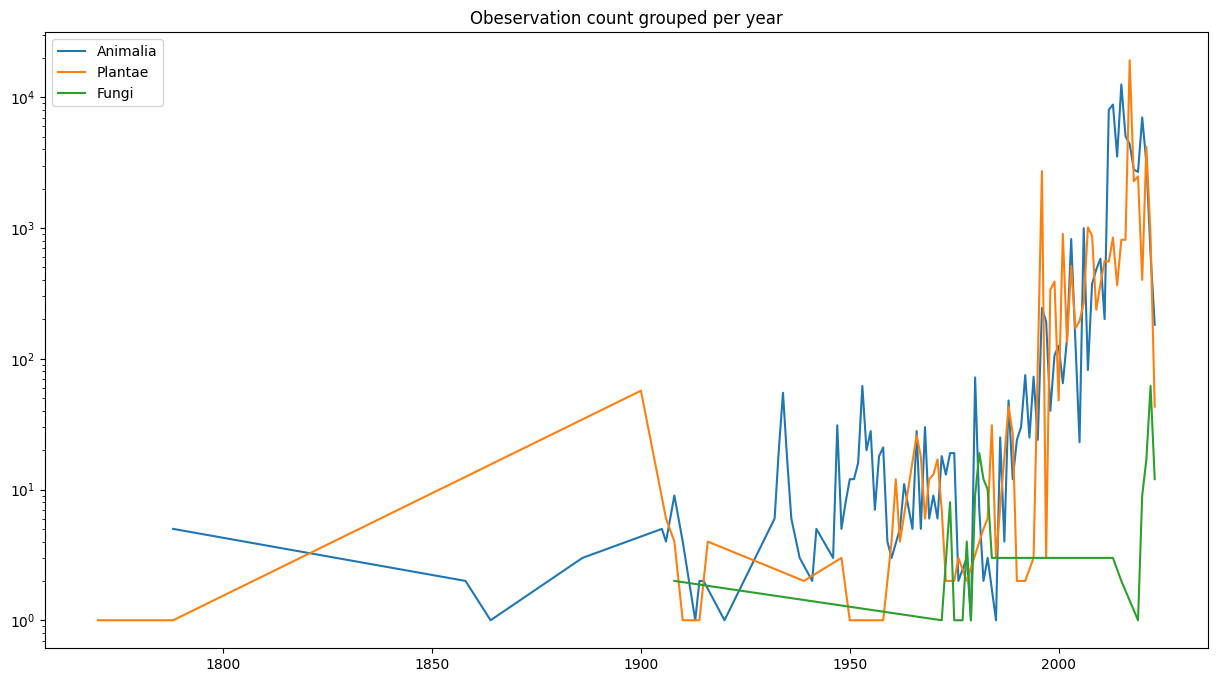

In [7]:
animal_yearly = animal_data.final_count.groupby([animal_data.date_clean.dt.year]).agg("sum")
plant_yearly = plant_data.final_count.groupby([plant_data.date_clean.dt.year]).agg("sum")
fungi_yearly = fungi_data.final_count.groupby([fungi_data.date_clean.dt.year]).agg("sum")

plt.figure(figsize=(15, 8))
plt.plot(animal_yearly.index, animal_yearly.values, label="Animalia")
plt.plot(plant_yearly.index, plant_yearly.values, label="Plantae")
plt.plot(fungi_yearly.index, fungi_yearly.values, label="Fungi")
plt.yscale("log")
plt.title("Obeservation count grouped per year")
plt.legend()
plt.show()

In [185]:
start_date = "1991-1-1"
end_date = "2021-12-31"

def get_date_bounded(df, start_date, end_date):
    """Filters the data with the given date range"""

    mask = (df.date_clean > start_date) & (df.date_clean <= end_date)
    bounded_df = df[mask]
    return bounded_df
    
a_bdf = get_date_bounded(animal_data, start_date, end_date)
p_bdf = get_date_bounded(plant_data, start_date, end_date)

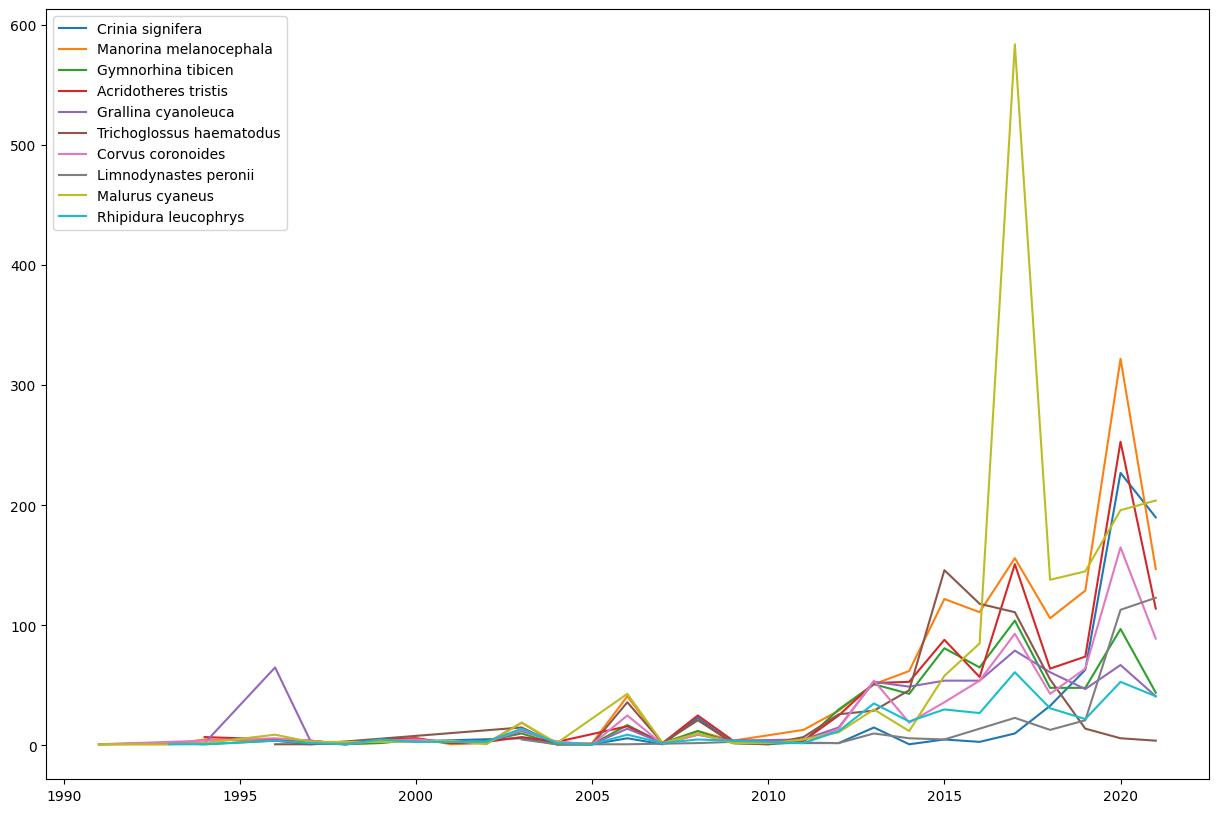

In [186]:
def show_historical_graph_per_species(df, top=10):
    """Show historical record of top N species data"""
    # IMPOTANT NOTE
    # individualCount - only represents visual observation. Sound observations can also be made
    plt.figure(figsize=(15,10))
    top_species = df.species.value_counts()[:top].index
    for spc in top_species:
        agg = df[df.species == spc].groupby(df.date_clean.dt.year)['final_count'].sum()
        plt.plot(agg.index, agg.values, label=spc)
    
#     plt.yscale("log")
    plt.legend()
    plt.show()
    
show_historical_graph_per_species(a_bdf)

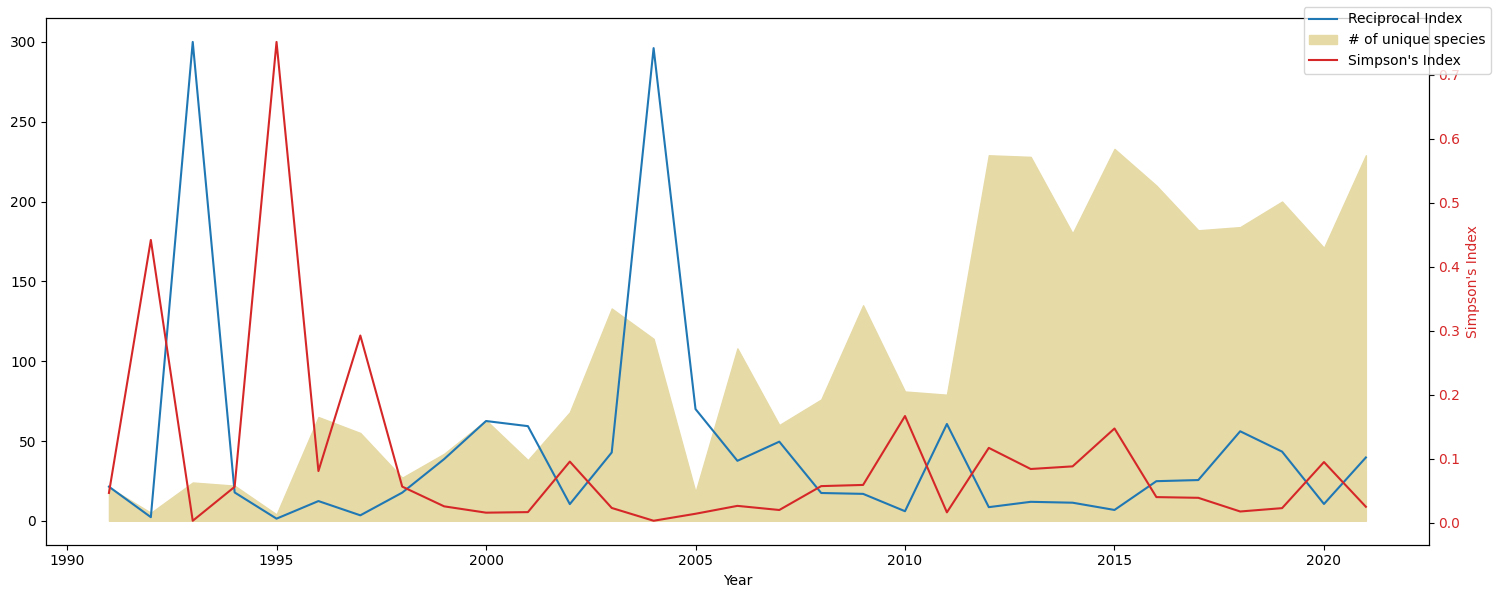

In [189]:
useful_cols = ["individualCount", "year", "references", "basisOfRecord", "occurrenceID", "date_clean", "final_count"]

def get_species_divserity_score(df):
    """
    Uses simpson's diversity index to get a year on year score.
    
    Sources:
    https://www.youtube.com/watch?v=7DOuku8876I
    http://www.countrysideinfo.co.uk/simpsons.htm
    https://geographyfieldwork.com/Simpson'sDiversityIndex.htm
    
    Will use Simpson's Reciprocal Index and Simpson's index
    - its easier to understand, score range is 1-N where N is total number of species
    - not affected by rare species count
    N(N-1) / sum(n(n-1))
    """
    year_range = df.date_clean.dt.year.unique()
    yoy_index = []
#     a = [1, 2, 10, 1, 1]
#     b = [4, 5, 6]
#     for year in [2001, 2002]:

    for year in year_range:
        _count = df[df.date_clean.dt.year == year].final_count.groupby([df.species]).agg("sum").values
        _total = 0
        for v in _count:
            _total += v * (v-1)
        
        _n = sum(_count)        
        index = _total / ((_n * (_n - 1)) or 1)
        r_index = 1 / (index or 1)
        # print(year ,len(_count), _total)
        # Return year, index, and total # of species, # total num of organism
        yoy_index.append((year, index, r_index, len(_count), _n))
    return np.array(sorted(yoy_index))

animal_index = get_species_divserity_score(a_bdf)
plant_index = get_species_divserity_score(p_bdf)


fig, ax1 = plt.subplots(figsize=(15,6))
ax1.set_xlabel("Year")
ax1.plot(animal_index[:, 0], animal_index[:, 2], label="Reciprocal Index") 
ax1.fill_between(animal_index[:, 0], animal_index[:, 3], color="#E6DAA6", label="# of unique species")
ax2 = ax1.twinx()  

ax2.set_ylabel("Simpson's Index", color=color)  # we already handled the x-label with ax1
ax2.plot(animal_index[:, 0], animal_index[:, 1], color="tab:red", label="Simpson's Index") 
ax2.tick_params(axis='y', labelcolor=color)

fig.legend()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


# make two twin plots instead

In [176]:
s = a_bdf[a_bdf.date_clean.dt.year == 2003].final_count.groupby([a_bdf.species]).agg("sum").values

array([ 4.,  1.,  8.,  7.,  4.,  1.,  7.,  3.,  3.,  3.,  1.,  3.,  2.,
        8.,  8.,  9.,  8.,  1.,  2.,  3.,  2.,  7.,  2.,  3.,  5.,  3.,
        1., 10.,  2.,  2., 13.,  3., 10.,  6.,  1.,  6.,  3.,  6.,  3.,
        5.,  3.,  1., 15.,  3.,  1.,  3.,  3.,  3.,  4.,  3.,  1.,  6.,
       12., 10.,  3., 19.,  1.,  1., 10.,  4.,  3.,  5.,  3., 88.,  3.,
        2.,  1.,  2., 19., 19., 11.,  2.,  2.,  2.,  3.,  6., 21.,  2.,
        3.,  1.,  8.,  2.,  6.,  2.,  4., 13.,  8., 14.,  1., 12.,  3.,
        3.,  3.,  2.,  3.,  2., 10.,  5.,  3.,  3.,  5.,  3.,  6.,  2.,
        3.,  3.,  9.,  1., 21., 14.,  3.,  2.,  2.,  3.,  2., 10., 45.,
        5.,  2., 16.,  3.,  3.,  4.,  4.,  1., 15.,  6.,  3.,  1.,  5.,
        5.,  3.,  5.])